# Introduction to Regression with Neural Networks in Tensorflow


Predicting a numerical variable based off of some combination of other variables

In [ ]:
# Inport Tensorflow

import tensorflow as tf
print(tf.__version__)

2.4.1


### Creating some data to view and fit

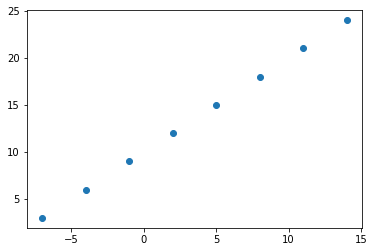

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X,y)

In [ ]:
# Lets get our intuition as to what X and y relationship is

y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [ ]:
#  Lets create a demo tensor for housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
X[0].shape, y[0].shape  # no shape of a rank 0 tensor X and y are scalars of rank 1

((), ())

In [ ]:
X[0].ndim  #rank 0 tensor

0

In [ ]:
# Turn numpy arrays inot tensors

X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

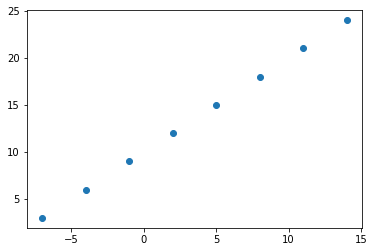

In [ ]:
plt.scatter(X, y)

## Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (which tells our model how to improve the patters it's learning) and the evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting the model** - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the Sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,   # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])        
#SDG is short for stochastic Gradient descent

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 507ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction with trained model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 10.9748  #Adding the mae error

array([[23.69082]], dtype=float32)

## Improve the model

We can improve our model by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hiffen layers, change the activation function of each layer

2. **Compiling a model** - here we might change the optimization function pr perhaps the learning rate of the optimization function

3. **Fitting a model** - here we might fit a model for more epochs (leave training for a longer time) or on more data ( give the model more examples to learn from)

In [ ]:
# Let' rebuild a model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Complile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 4

In [ ]:
# Remind oirselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Lets see if our model prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let' rebuild a model
# With a extra hidden layer with 100 hidden units

tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(1)
])

# 2. Complile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 13.0472 - mae: 13.0472
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.5478 - mae: 12.5478
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0448 - mae: 12.0448
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 11.5354 - mae: 11.5354
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0171 - mae: 11.0171
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4872 - mae: 10.4872
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9430 - mae: 9.9430
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3817 - mae: 9.3817
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.8004 - mae: 8.8004
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1962 - mae: 8.1962
Epoch 11/100
1/1 [==============================] - 0s 4ms/step -

In [ ]:
# Let's remind ourselves of the X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's make a prediction
model.predict([17.0])

array([[29.006927]], dtype=float32)

In [ ]:
# Let's see if we can make more changes to our model to make it better
# With 1 extra hidden layer with 100 hidden units and a relu activation function

tf.random.set_seed(42)
# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Complile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 356ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2313 - mae: 12.2313
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1440 - mae: 12.1440
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.0564 - mae: 12.0564
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9685 - mae: 11.9685
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8805 - mae: 11.8805
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7922 - mae: 11.7922
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7036 - mae: 11.7036
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.6149 - mae: 11.6149
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5260 - mae: 11.5260
Epoch 11/100
1/1 [==============================] - 0s 4m

In [ ]:
# Let's remind ourselves of the X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's make a prediction
model.predict([17.0])

array([[31.403917]], dtype=float32)

In [ ]:
# Let's see if we can make more changes to our model to make it better
# With 1 extra hidden layer with 100 hidden units and a relu activation function

tf.random.set_seed(42)
# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Complile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 353ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - los

In [ ]:
model.predict([17.0])

array([[26.206877]], dtype=float32)

**Note:** The learning rate is perhaps the most important hyper parameter

In [ ]:
# Let's see if we can make more changes to our model to make it better
# With 2 extra hidden layer with 100 hidden units and a relu activation function

tf.random.set_seed(42)
# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Complile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 392ms/step - loss: 13.3925 - mae: 13.3925
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5473 - mae: 10.5473
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6333 - mae: 8.6333
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 6.5549 - mae: 6.5549
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 4.1624 - mae: 4.1624
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 4.3911 - mae: 4.3911
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 5.1939 - mae: 5.1939
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 5.3084 - mae: 5.3084
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 4.9715 - mae: 4.9715
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 4.3370 - mae: 4.3370
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [ ]:
model.predict([17.0])

array([[26.77314]], dtype=float32)

In [ ]:
# Let's see if we can make more changes to our model to make it better
# With 3 extra hidden layer with 100 hidden units and a relu activation function

tf.random.set_seed(42)
# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)
])

# 2. Complile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 433ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4022 - mae: 10.4022
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5498 - mae: 7.5498
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 3.9338 - mae: 3.9338
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9994 - mae: 6.9994
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8826 - mae: 6.8826
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 5.1422 - mae: 5.1422
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 3.8511 - mae: 3.8511
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 4.7632 - mae: 4.7632
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3792 - mae: 5.3792
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 5

In [ ]:
model.predict([17.0])

array([[24.651588]], dtype=float32)

### Common ways to improve the model

1. Adding layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimization function
5. Change the learning rate
6. Fitting on more data
7. Fitting for longer

Note: Because we can change each of the above mentioned, they are called hyperparameters

## Evaluating a model

In practice, the following is the typical workflow you'll go through

`Build a model -> Fit it -> Evaluate it -> Tweak a model -> fit it -> Evaluate it -> Tweak a model -> ....`

When it comes to evaluation the most importan thing is 
> **Visualize**

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - How does the model perform while it learns?
* The predictions of the model - how do the predictions of he model line up with the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range (-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

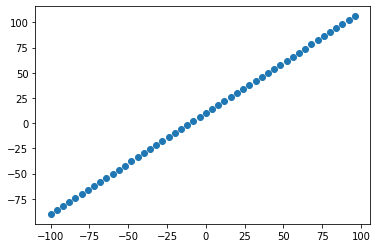

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

## The three sets are...

* **Training set** - The model learns form this data, which is typically 70-80% of the total data available
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of thr data available
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have

len(X)

50

In [ ]:
# Split the data into train and test sets

X_train = X[:40] # the first 40 samples are for training (80% of data)
y_train = y[:40]

X_test = X[40:] # the last 10 samples are for testing (20% of data)
y_test = y[40:] # the last 10 samples are for testing (20% of data)

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we've got the data in training and testing sets
Let's visualize it again

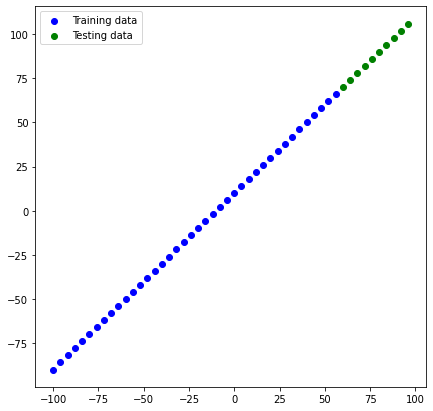

In [ ]:
plt.figure(figsize=(7,7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot testing data in blue
plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.legend()

In [ ]:
# Lets build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Complile the model

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing our model

In [ ]:
# model.summary() # Gives an error as the model hasn't been built

# model.build(input shape) can be done before summary in order to build the model

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's create a model that builds automatically by defining the inpt shape in the first layers
tf.random.set_seed(42)

# 1. Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Complile the model (same as above)

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params- total number of parameters in the model
* Trainable params- there are the parameters(patterns) the model can update as it trains
* non-trainable params- These parameters aren't updated during training. (This typically happens when we bring another set of parameters from other models during **transfer learning**) 

Also check for:

Trainable params in a neural network
Base neural networks weights matrix and biases vectors
Dense / Fully network

In [ ]:
# Let's fit our model to the training data

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss:

If we keep running the above code continuously, then it will fit our model for 200 times if we run twice, 300 times if we run thrice and so on. This is because the no. of epocjs is 100. To reset that we'll have to create and compile the model again (Run the previous cell again)

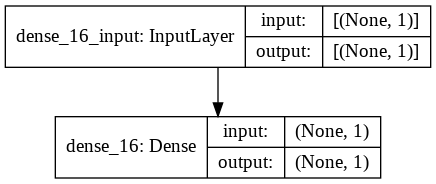

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="one_of_the_many_models_we_build")

# 2. Complile the model (same as above)

model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

In [ ]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/100
2/2 [==============================] - 0s 3ms

In [ ]:
model.summary()

Model: "one_of_the_many_models_we_build"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


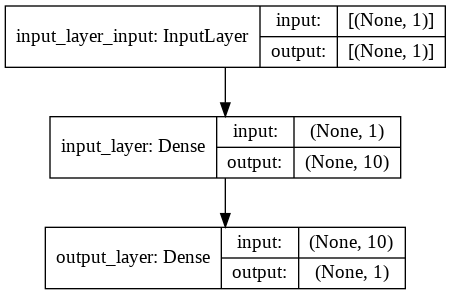

In [ ]:
plot_model(model=model, show_shapes=True)

##Visualize the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

Often we see them in the form of y_test or y_true versus y_pred (the ground truth versus our model)

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test  # Ground truth labels

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Note: If you think you'll use some functionality in the future, it's better to put it in a function

In [ ]:
# Let's create a plotting function

def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions= y_pred):
    """
    Plot the training data , test data and compares predictions to ground truth labels
    """
    plt.figure(figsize=(10,10))
    # Plot the training data in green

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    
    #Plot the testing data in green 

    plt.scatter(test_data, test_labels, c="g", label="Testing Data")

    # Plot the predictions in red

    plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.legend()

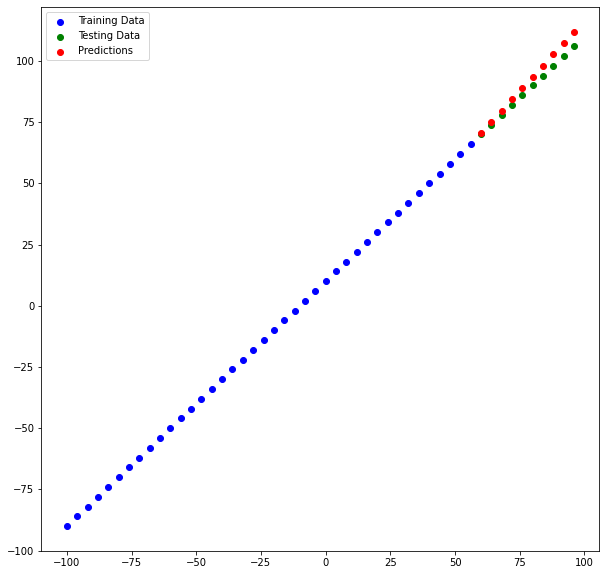

In [ ]:
plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions= y_pred)

## Evaluating our model's predictions with regression evaluation metrics

Depending on the proble, there will be different evaluation metrics to evaluate our model

Since our model is a regression model, two of the main metrics are:
* MAE - mean absolute error "on average how much absolute error (positive error = |error|) is present"  - generally used as a starting point for any regression problem
* MSE - mean square error " on average how much squared error (squared error = error^2) is present" - generally used when big errors have a huge impact on the efficiency and quality of model

one more is:
* Huber - It is a combination of MSE and MAE and is less affected by outliers than MSE

In [ ]:
# Evaluate the model on the test

model.evaluate(X_test, y_test) #the output is loss and metrics: these are given during model compilation

1/1 [==============================] - 0s 136ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate mean absolute error

mae = tf.metrics.mean_absolute_error(y_true= y_test, 
                                     y_pred = y_pred)
# or tf.keras.metrics.mean_absolute_error()

mae # This output will give an array of mae: This is because, the y_test has a shape of(10,) and y_pred has a shape of(10,1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
# We should remove the extra dimension from y_pred

#Use tf.squeeze

tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error again

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae  # same as the tf.evaluate()

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

#### Mean squared error

In [ ]:
# Check the mean squared error

mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

### Done on own

In [ ]:
std_dev = tf.math.reduce_std(tf.cast(y_train, tf.float32))
huber = tf.keras.losses.huber(y_true=y_test, y_pred=tf.squeeze(y_pred), delta=std_dev)
huber

#Done on own

<tf.Tensor: shape=(), dtype=float32, numpy=6.5350714>

On own ends

### make some functions to reuse MSE and MSE

In [ ]:
def mae (y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred= tf.squeeze(y_pred))
    
def mse (y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                          y_pred= tf.squeeze(y_pred))

### Running experiments to improve our model

1. get more data - more examples for our model to train on
2. make our model larger (using a more complex model) - ex: more layers, more hidden units in earch layer
3. train for longer - give your model more time to find patterns

Let's do 3 modelling experiments:
1. `model-1` -same as the original model, 1 layer, trained for 100 epochs
2. `model-2` -2 layer, trained for 100 epochs
3. `model-3` -2 layer, trained for 500 epochs

**Build model_1**

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([ 
    tf.keras.layers.Dense(1)                                            
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.mae])

# 3. Fit the model

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 16.4124 - mean_absolute_error: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mean_absolute_error: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1242 - mean_absolute_error: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mean_absolute_error: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8003 - mean_absolute_error: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.5263 - mean_absolute_error: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.4102 - mean_absolute_error: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1449 - mean_absolute_error: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.4932 - mean_absolute_error: 19.4932
Epoch 10/100
2/2 [==

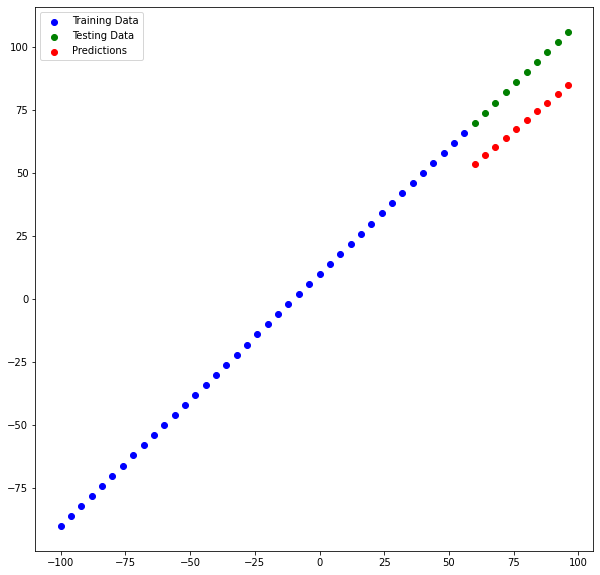

In [ ]:
# make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build model_2**

2 dense layers running for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 31.5187 - mse: 1433.3082
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8490 - mse: 1141.6672
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.3537 - mse: 1129.8183
Epoch 11/100
2/2 [==========================

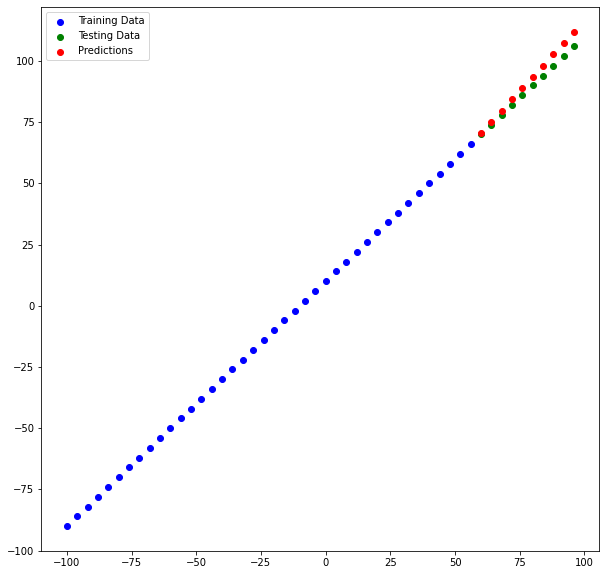

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

**Build model_3**
Build model of 2 layers trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model

model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 26.8627 - mse: 1015.8977
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 24.4175 - mse: 767.5334
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 31.5187 - mse: 1433.3082
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8490 - mse: 1141.6672
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.6465 - mse: 267.4541
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.9682 - mse: 169.5529
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0874 - mse: 141.6589
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.3978 - mse: 167.3422
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 42.4087 - mse: 2772.5432
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 28.3537 - mse: 1129.8183
Epoch 11/500
2/2 [==========================

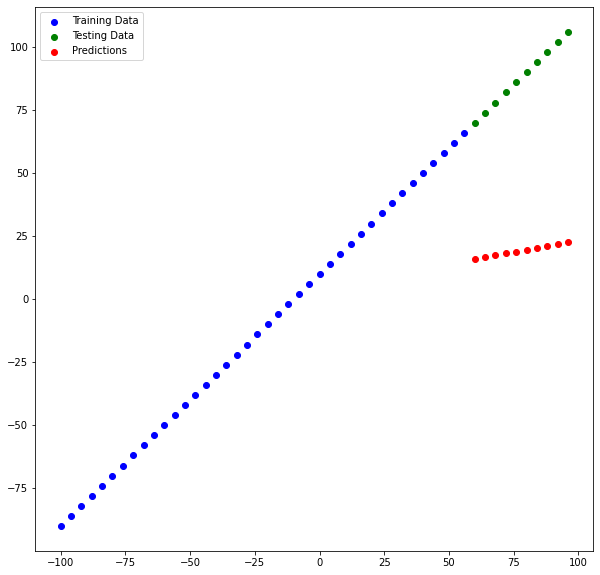

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### On own

In [ ]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model

my_model = tf.keras.Sequential(
    layers=[tf.keras.layers.Dense(40, input_shape=(1,)),
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(40, activation='relu'),
            tf.keras.layers.Dense(1)]
    )


# 2. Compile the model

my_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mse"])

# 3. Fit the model

my_model.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 42.2512 - mse: 2447.9295
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 37.9907 - mse: 1998.8449
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 34.2784 - mse: 1621.9976
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 30.6170 - mse: 1299.1794
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4946 - mse: 1061.0043
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 24.3460 - mse: 818.7739
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 20.7147 - mse: 590.7936
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 16.3660 - mse: 361.5959
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 13.0989 - mse: 242.3504
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 9.4898 - mse: 125.8575
Epoch 11/500
2/2 [==========================

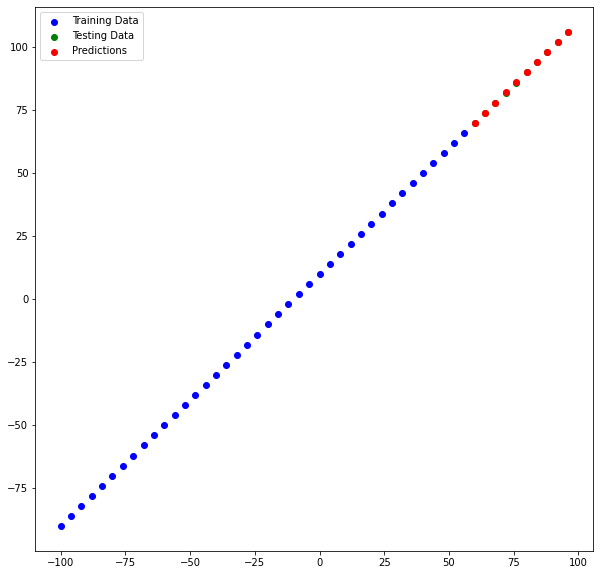

In [ ]:
my_pred = my_model.predict(X_test)
plot_predictions(predictions=my_pred)

In [ ]:
my_mae = mae(y_test, my_pred)
my_mse = mse(y_test, my_pred)

my_mae, my_mse

(<tf.Tensor: shape=(), dtype=float32, numpy=0.070510104>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0050278204>)

In [ ]:
my_model.predict([[17.0]]), my_model.predict([[23.0]])

(array([[27.05031]], dtype=float32), array([[33.034737]], dtype=float32))

On own ends

**Note** :  You want to start with small experiments (small models) and then increase the complexity with baby steps

### Comparing the results of our experiments

We've run some experiments, lets compare the results obtained from these experiments

In [ ]:
#Let's compare our model's results uning pandas data frame

import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3],]

all_results = pd.DataFrame(model_results, columns = ["model name", "MAE", "MSE"])
all_results

,model name,MAE,MSE
0,model_1,"tf.Tensor(18.745327, shape=(), dtype=float32)","tf.Tensor(353.57336, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(3.1969407, shape=(), dtype=float32)","tf.Tensor(13.070143, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(68.713615, shape=(), dtype=float32)","tf.Tensor(4808.0273, shape=(), dtype=float32)"


In [ ]:
# In the above exampe. lets change the tensors to numpy

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", my_mae.numpy(), my_mse.numpy()],]

all_results = pd.DataFrame(model_results, columns = ["model name", "MAE", "MSE"])
all_results

,model name,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344
3,model_4,0.070510,0.005028


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 40)                80        
_________________________________________________________________
dense_23 (Dense)             (None, 100)               4100      
_________________________________________________________________
dense_24 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 41        
Total params: 8,261
Trainable params: 8,261
Non-trainable params: 0
_________________________________________________________________


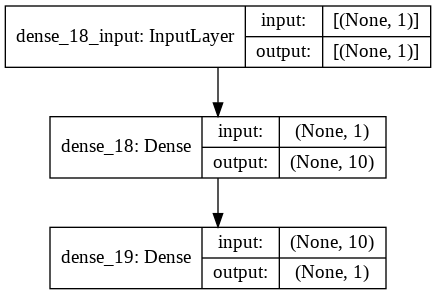

In [ ]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

## Tracking our experiments

A good practice in machine learning modelling is to track the resuls of our experiments.
And when soing so, it can become a tedious task when handling large data or runing lots of experiments

But luckily there are tools that can help us:
* TensorBoard - a component of the Tensorflow library to help track modelling experiments
* Weights & Biases - a tool for tracking all kinds of machine learning models (plugs rihjt into tensorboard)


## Saving our models

saving our models allow us to use them outside the place where they were trained (outside of google collab for our example)

Two main formats we can save our model to:
1. The SavedModel Format
2. The HDF5 Format

In [ ]:
# Save the model using SavedModel format

model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save the model using the HDF5 format

model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with loaded_SavedModel_format model

model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in the HDF5 model format

loaded_HDF5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")

loaded_HDF5_format.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded_HDF5_format model has same predictions as model_2

loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)

model_2_preds == loaded_HDF5_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds.squeeze() == loaded_HDF5_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Downloading a file from google collab

There are 2 ways:
1. Use the "file" tab and rihjt click the 3 dots to see the download option
2. Using code (shown below)
3. Save it to google drive and then copying it from there (second code cell below)

In [ ]:
# Downloading a file from google collab

from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Mount google drive by clicking the drive option in the "files" tab

!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Tensorflow_Uploads

In [ ]:
!ls /content/drive/MyDrive/Tensorflow_Uploads/

best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
 insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
 insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"].dtype, insurance["age"].dtype, insurance["charges"].dtype

(dtype('O'), dtype('int64'), dtype('float64'))

As some of the columns have a different data type than numberical, we need to encode them. We can use one hot encoding

In [ ]:
#Let's one hot encode the Dataframe

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X and y (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
#view X
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# View y
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Create training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [ ]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Build a neural network for learning a regression pattern between features and labels


# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mse"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 10200.7270 - mse: 232906844.3429
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mse: 166405438.1714
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mse: 144605314.0571
Epoch 4/100
34/34 [==============================] - 0s 903us/step - loss: 8083.4829 - mse: 186700532.5714
Epoch 5/100
34/34 [==============================] - 0s 902us/step - loss: 7793.8446 - mse: 165165045.0286
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mse: 167119768.6857
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mse: 171115835.8857
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mse: 162392114.7429
Epoch 9/100
34/34 [==============================] - 0s 945us/step - loss: 7588.8130 - mse: 166288482.7429
Epoch 10/100
34/34 [============================

In [ ]:
# Check the results of the insurance model on test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mse: 111577840.0000


[7023.3291015625, 111577840.0]

Our model seems to go off by around 7000
Lets check what is the median of the data we have for y_train

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

The above mean and median shows that the model is quite off
Let's try to improve it

To try to improve our model, let's run a few experiments:


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model_1 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mse"])


# 3. Fit the model
insurance_model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mse: nan              
Epoch 2/100
34/34 [==============================] - 0s 912us/step - loss: nan - mse: nan
Epoch 3/100
34/34 [==============================] - 0s 995us/step - loss: nan - mse: nan
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/100
34/34 [==============================] - 0s 991us/step - loss: nan - mse: nan
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/100
34/34 [==============================] - 0s 963us/step - loss: nan - mse: nan
Epoch 11/100
34/34 [==============================] - 0s 983us/step - loss: nan - mse: nan
Epoch 

The above model shows nan for all losses and metrics. This may happen because we have built a model that is either very complex or very big for our training set.

**Experiment 1**

Adding an extra layer and optimizer is now Adam

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model_1 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), ## Changed from SGD
                          metrics=["mse"])


# 3. Fit the model
insurance_model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mse: 317100113.3714
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mse: 305327480.6857
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12248.2855 - mse: 283856073.6000
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mse: 309174394.5143
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mse: 268266330.5143
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mse: 236235459.2000
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mse: 194857083.4286
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mse: 170648431.5429
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mse: 155405644.8000
Epoch 10/100
34/34 [==============================

In [ ]:
# Check the larger model
insurance_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mse: 100286856.0000


[4924.34765625, 100286856.0]

**Experiment 2**

Running for a longer time 200 epochs (same as original model)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model_2 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mse"])


# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mse: 232906844.3429
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mse: 166405438.1714
Epoch 3/200
34/34 [==============================] - 0s 959us/step - loss: 6983.7824 - mse: 144605314.0571
Epoch 4/200
34/34 [==============================] - 0s 959us/step - loss: 8083.4829 - mse: 186700532.5714
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mse: 165165045.0286
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mse: 167119768.6857
Epoch 7/200
34/34 [==============================] - 0s 987us/step - loss: 7678.4977 - mse: 171115835.8857
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mse: 162392114.7429
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mse: 166288482.7429
Epoch 10/200
34/34 [============================

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5498.5771 - mse: 83644504.0000


[5498.5771484375, 83644504.0]

**Experiment 3**

Combining experiment 1 and 2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

insurance_model_3 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(10),
            tf.keras.layers.Dense(1)
    ]
)

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), ## Changed from SGD
                          metrics=["mse"])


# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mse: 317100113.3714
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mse: 305327480.6857
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mse: 283856073.6000
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mse: 309174394.5143
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mse: 268266330.5143
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mse: 236235459.2000
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mse: 194857083.4286
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mse: 170648431.5429
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7537.6737 - mse: 155405644.8000
Epoch 10/200
34/34 [==============================

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mse: 42306288.0000


[3491.296142578125, 42306288.0]

Text(0.5, 0, 'epochs')

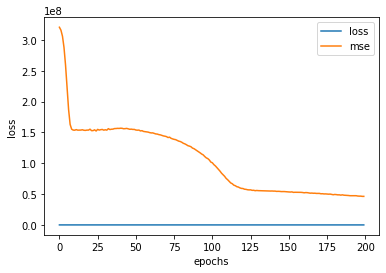

In [ ]:
# Let's also plot the history 
# We used history to store the results from the insurance_model_3.fit()
# This plot is also called the loss curve or a training curve

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


#### **Question:** 

How long should you train for?
It depends. Find a sweet spot between underfitting and overfitting

Tensorflow has something called as **early stopping callback** which is a tensorflow component which can be added to the model so that ot can stop the training once a certain metrics stops improving

**Experiment 4**

(on own)

Adding more layers and adding activation ffunctions to experiment 3

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_4 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(50, activation='relu'),
             tf.keras.layers.Dense(25),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1),
    ]
)

# 2. Compile a model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mse"])


# 3. Fit the model
history_4 = insurance_model_4.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13279.9161 - mse: 317905977.6000
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12734.6937 - mse: 304364598.8571
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 11093.4193 - mse: 253929218.7429
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 7993.9337 - mse: 186616121.1429
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 7540.9741 - mse: 153190385.3714
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7445.6670 - mse: 163167815.3143
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7277.1000 - mse: 153426549.0286
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7314.5222 - mse: 157857962.5143
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7242.3714 - mse: 153944317.0286
Epoch 10/200
34/34 [==============================] 

In [ ]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1902.2141 - mse: 22221974.0000


[1902.214111328125, 22221974.0]

Text(0.5, 0, 'epochs')

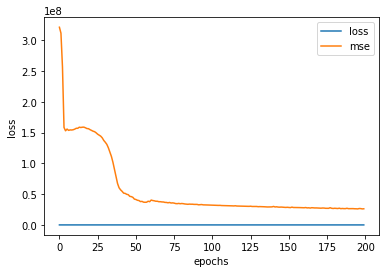

In [ ]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (Normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization

If in doubt, perform both and choose the better one.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


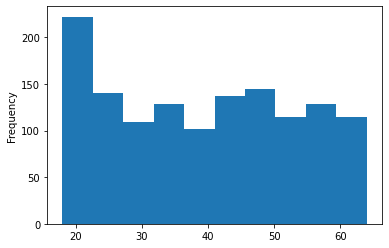

In [ ]:
X["age"].plot(kind="hist")

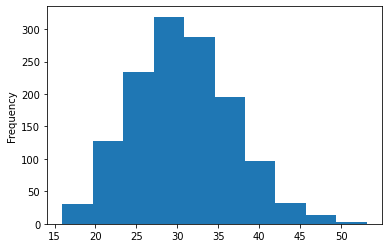

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Lets do normalization of numerical features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Get the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we need to use some classes from sci-kit learn

In [ ]:
 from sklearn.compose import make_column_transformer
 from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
 from sklearn.model_selection import train_test_split

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # One hot encode these values and ignore the columns unkown to the OneHotEncoder
)


# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]


#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the column transformer to only training data
ct.fit(X_train)


# Transorm training and test data with normalizations (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and oneHotEncoded

So now let's build a neural network to see how it goes

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_5 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)   ## same as insurance_model_2


# 2. Compile the model 
insurance_model_5.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mse"])


# 3. Fit the model
history_5 = insurance_model_5.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mse: 318380876.8000
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mse: 310344590.6286
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mse: 296305667.6571
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mse: 337248675.6571
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mse: 320948216.6857
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mse: 320583041.8286
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mse: 311903779.6571
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mse: 314339615.0857
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12508.0465 - mse: 296599862.8571
Epoch 10/100
34/34 [==========================

In [ ]:
# Evaluate our model trained on normalised data

insurance_model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mse: 41750900.0000


[3438.784423828125, 41750900.0]

#### The insurance model 2 resuts were:

loss: 5498.5771 - mse: 83644504.0000


#### The insurance model 5 results were:

loss: 3438.7844 - mse: 41750900.0000


**Hence normalization helps a neural network lean and perform better (our model tends to cenverge faster, though this may not always be true)**


### On Own

**Experiment 6**

pd.DataFrame(history_5.history).plot()
plt.ylabel("Loss and MSE")
plt.xlabel("Epochs")

Traing for longer (200 epochs)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_6 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)   ## same as insurance_model_2


# 2. Compile the model 
insurance_model_6.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mse"])


# 3. Fit the model
history_6 = insurance_model_6.fit(X_train_normal, y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13296.4671 - mse: 318380876.8000
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mse: 310344590.6286
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12705.2201 - mse: 296305667.6571
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mse: 337248675.6571
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13230.8567 - mse: 320948216.6857
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mse: 320583041.8286
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mse: 311903779.6571
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mse: 314339615.0857
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mse: 296599862.8571
Epoch 10/200
34/34 [==========================

In [ ]:
insurance_model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.7632 - mse: 41703396.0000


[3171.76318359375, 41703396.0]

Text(0.5, 0, 'Epochs')

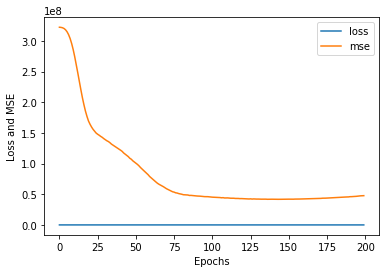

In [ ]:
pd.DataFrame(history_6.history).plot()
plt.ylabel("Loss and MSE")
plt.xlabel("Epochs")

**Experiment 7**

Training on normal data for experiment 4

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_7 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(50, activation='relu'),
            tf.keras.layers.Dense(25),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1),
    ]
)

# 2. Compile a model
insurance_model_7.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mse"])


# 3. Fit the model
history_7 = insurance_model_7.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13297.9118 - mse: 318415827.2000
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12943.8145 - mse: 310205125.4857
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12568.4287 - mse: 292597121.3714
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12279.3642 - mse: 308886042.5143
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9362.6399 - mse: 214942236.8000
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8020.8592 - mse: 156386234.9714
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7691.3889 - mse: 144957630.6286
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7526.1201 - mse: 138278185.1429
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7169.2090 - mse: 123828205.2571
Epoch 10/200
34/34 [==============================]

Text(0.5, 0, 'Epochs  Experiment 4')

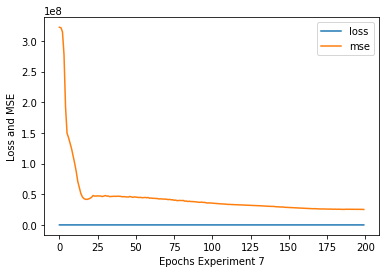

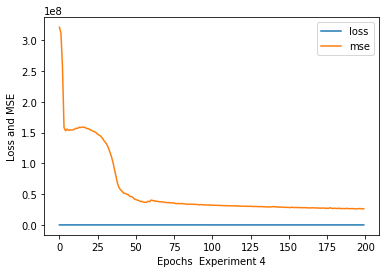

In [ ]:
pd.DataFrame(history_7.history).plot()
plt.ylabel("Loss and MSE")
plt.xlabel("Epochs Experiment 7")
pd.DataFrame(history_4.history).plot()
plt.ylabel("Loss and MSE")
plt.xlabel("Epochs  Experiment 4")

In [ ]:
eval_model_7 = insurance_model_7.evaluate(X_test_normal, y_test)
eval_model_7[0], eval_model_7[1]

9/9 [==============================] - 0s 2ms/step - loss: 1776.2266 - mse: 21049296.0000


(1776.2265625, 21049296.0)

The above 2 plots show that using normalization the model converged faster

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


#### **On own experimentation**

In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
col_tran = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown='error', drop='first'), ["sex", "smoker", "region"])
)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
xtrain

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [ ]:
col_tran.fit(xtrain)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
xtrain_n = col_tran.transform(xtrain)
xtest_n = col_tran.transform(xtest)

In [ ]:
xtrain_n

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
xtrain_n.shape, xtrain.shape

((1070, 8), (1070, 6))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model
insurance_model_8 = tf.keras.Sequential(
    layers=[
            tf.keras.layers.Dense(100, activation='relu'),
            tf.keras.layers.Dense(50, activation='relu'),
            tf.keras.layers.Dense(25),
            tf.keras.layers.Dense(10, activation='relu'),
            tf.keras.layers.Dense(1),
    ]
)

# 2. Compile a model
insurance_model_8.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mse"])


# 3. Fit the model
history_8 = insurance_model_8.fit(xtrain_n, ytrain, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13297.9833 - mse: 318417888.0000
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12946.9012 - mse: 310273526.8571
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12617.2978 - mse: 293676115.2000
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12666.6932 - mse: 316863756.8000
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10315.0109 - mse: 238641473.8286
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 7705.3198 - mse: 151958202.9714
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7355.6788 - mse: 121840457.8286
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7149.6325 - mse: 121451494.6286
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 6848.7847 - mse: 109093255.7714
Epoch 10/200
34/34 [==============================

Text(0.5, 0, 'Epochs  Experiment 8')

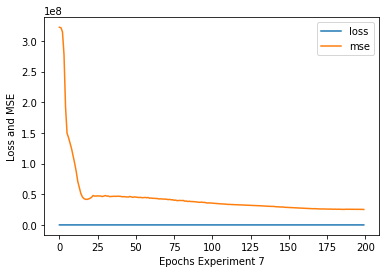

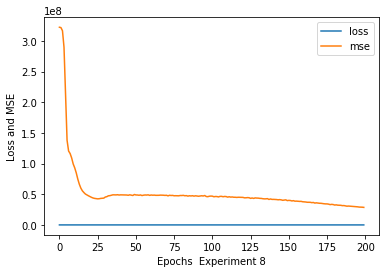

In [ ]:
pd.DataFrame(history_7.history).plot()
plt.ylabel("Loss and MSE")
plt.xlabel("Epochs Experiment 7")
pd.DataFrame(history_8.history).plot()
plt.ylabel("Loss and MSE")
plt.xlabel("Epochs  Experiment 8")

In [ ]:
insurance_model_7.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1776.2266 - mse: 21049296.0000


[1776.2265625, 21049296.0]

In [ ]:
insurance_model_8.evaluate(xtest_n, ytest)

9/9 [==============================] - 0s 2ms/step - loss: 2124.8059 - mse: 24359710.0000


[2124.805908203125, 24359710.0]